# Propuestas/Avances Santiago

## Librerías

In [1]:
import pandas as pd

# Expansión WORKLOGS

In [2]:
import os
from os.path import dirname, abspath

import html2text
import re
from dateparser.search import search_dates

Extracción del "Current Working Directory"

In [3]:
repo_dir = dirname(abspath(os.getcwd()))

Carga del **`.txt`**

In [4]:
txt = open(repo_dir + '\Data\HISTORICOS_OT\HistoriaJDE_OT_3778224.txt').read()
txt = html2text.html2text(txt)
txt = txt.replace('\n', ' ')
txt

"2018/10/25 RUBEN ARBOLEDA Se crea OT para realizar actividades previas y de reparación de las Juntas del estator Unidad 1. 2018-10-25 REALIZÓ: JHONATAN ANDRES USME - EDWAR ALEXANDER LONDOÑO, PROGRAMO: RARBOLG OT: 3778224, PASO:1 Se desmontaron las cuñas del estator de la ranura numero 149, para determinar la cantidad necesaria y disponible en el almacén, se extrajeron 5 tipos de cuña. 2018-10-27 REALIZÓ: SEBASTIAN HINCAPIE HURTADO - MATEO PEREZ (GUADALUPE), PROGRAMO: RARBOLG OT: 3778224, PASO:2 Se retiraron los sensores de los gatos de frenado de la Unidad 1, para el movimiento de los cascos del estator en la apertura de Juntas. 2018-11-02 REALIZÓ: OSCAR ALIRIO GIRALDO - JHONATAN ANDRES USME - MARIO MORALES (GUADALUPE), PROGRAMO: RARBOLG OT: 3778224, PASO:5 Se recibe el equipo de soldadura por inducción compuesto de: 2018-11-03 REALIZÓ: OSCAR ALIRIO GIRALDO - MARIO MORALES (GUADALUPE), PROGRAMO: RARBOLG OT: 3778224, PASO:6 Se realizó ubicación en zona cercana al estator, se realizó li

Búsqueda de substrings en formato fecha con la librería **`dateparser`**, validación y limpieza de los substrings usando **`regex`** y su conversión a `DataFrame` usando **`pandas`**.

In [5]:
#Busqueda de fechas
dates = search_dates(txt)
dates_array = []
for date in dates:
    dates_array.append(date[0])

#Validación de formato y eliminación de valores inválidos usando REGEX
r = re.compile("[0-9]{4}(-|/)[0-9]{2}(-|/)[0-9]{2}")
date_splitters = list(filter(r.match, dates_array))

#Separación del texto
test_str = [txt]
splitters = date_splitters

arr = test_str
    
for splitter in splitters:
    str_to_split = arr[-1]
    arr = arr[:-1]
    new_lines = str_to_split.split(splitter + ' ') #Revisar si es necesario el espacio al final
    for line in new_lines:
        arr.append(line)

df_out = pd.DataFrame()
df_out['DATE'] = pd.to_datetime(date_splitters)
df_out['CONTENT'] = arr[1:]
df_out

,DATE,CONTENT
0,2018-10-25,RUBEN ARBOLEDA Se crea OT para realizar activi...
1,2018-10-25,REALIZÓ: JHONATAN ANDRES USME - EDWAR ALEXANDE...
2,2018-10-27,REALIZÓ: SEBASTIAN HINCAPIE HURTADO - MATEO PE...
3,2018-11-02,REALIZÓ: OSCAR ALIRIO GIRALDO - JHONATAN ANDRE...
4,2018-11-03,REALIZÓ: OSCAR ALIRIO GIRALDO - MARIO MORALES ...
...,...,...
93,2019-01-11,"REALIZÓ: JHONATAN ANDRES USME, PROGRAMO: ELOND..."
94,2019-01-12,"REALIZÓ: JUAN DAVID GARCIA, PROGRAMO: ELONDOOC..."
95,2019-01-18,REALIZÓ: JHONATAN ANDRES USME - JUAN ESTEBAN C...
96,2019-01-19,REALIZÓ: JUAN DAVID GARCIA - FERNANDO ANTONIO ...


In [6]:
print(df_out.loc[0][0], '\n', df_out.loc[0][1], '\n')
print(df_out.loc[1][0], '\n', df_out.loc[1][1], '\n')
print(df_out.loc[2][0], '\n', df_out.loc[2][1], '\n')

2018-10-25 00:00:00 
 RUBEN ARBOLEDA Se crea OT para realizar actividades previas y de reparación de las Juntas del estator Unidad 1.  

2018-10-25 00:00:00 
 REALIZÓ: JHONATAN ANDRES USME - EDWAR ALEXANDER LONDOÑO, PROGRAMO: RARBOLG OT: 3778224, PASO:1 Se desmontaron las cuñas del estator de la ranura numero 149, para determinar la cantidad necesaria y disponible en el almacén, se extrajeron 5 tipos de cuña.  

2018-10-27 00:00:00 
 REALIZÓ: SEBASTIAN HINCAPIE HURTADO - MATEO PEREZ (GUADALUPE), PROGRAMO: RARBOLG OT: 3778224, PASO:2 Se retiraron los sensores de los gatos de frenado de la Unidad 1, para el movimiento de los cascos del estator en la apertura de Juntas.  



# Procesamiento de texto con `nltk`

In [7]:
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shern\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
new_txt = ''.join(df_out['CONTENT'].str.lower())
clean_txt = [word for word in nltk.word_tokenize(new_txt) if not word in stopwords.words('spanish') and word.isalpha()]
clean_txt_s = pd.Series(clean_txt)
clean_txt

['ruben',
 'arboleda',
 'crea',
 'ot',
 'realizar',
 'actividades',
 'previas',
 'reparación',
 'juntas',
 'estator',
 'unidad',
 'realizó',
 'jhonatan',
 'andres',
 'usme',
 'edwar',
 'alexander',
 'londoño',
 'programo',
 'rarbolg',
 'ot',
 'desmontaron',
 'cuñas',
 'estator',
 'ranura',
 'numero',
 'determinar',
 'cantidad',
 'necesaria',
 'disponible',
 'almacén',
 'extrajeron',
 'tipos',
 'cuña',
 'realizó',
 'sebastian',
 'hincapie',
 'hurtado',
 'mateo',
 'perez',
 'guadalupe',
 'programo',
 'rarbolg',
 'ot',
 'retiraron',
 'sensores',
 'gatos',
 'frenado',
 'unidad',
 'movimiento',
 'cascos',
 'estator',
 'apertura',
 'juntas',
 'realizó',
 'oscar',
 'alirio',
 'giraldo',
 'jhonatan',
 'andres',
 'usme',
 'mario',
 'morales',
 'guadalupe',
 'programo',
 'rarbolg',
 'ot',
 'recibe',
 'equipo',
 'soldadura',
 'inducción',
 'compuesto',
 'realizó',
 'oscar',
 'alirio',
 'giraldo',
 'mario',
 'morales',
 'guadalupe',
 'programo',
 'rarbolg',
 'ot',
 'realizó',
 'ubicación',
 'zona'

In [9]:
clean_txt_s.value_counts()[:20]

realizó      172
ot            99
programo      98
unidad        74
rarbolg       73
guadalupe     71
estator       57
juan          47
garcia        41
junta         41
david         41
morales       40
mario         40
cabezas       33
andres        32
jhonatan      32
usme          32
mateo         30
perez         30
apoyo         29
dtype: int64

<AxesSubplot:>

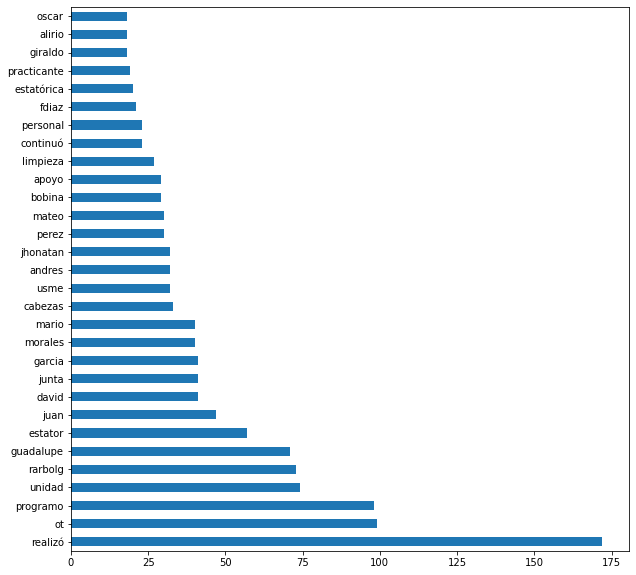

In [10]:
fd = pd.Series(nltk.FreqDist(clean_txt))
fd.sort_values(ascending=False).iloc[:30].plot(figsize=(10,10), kind='barh')

# Creación de WordClouds con `wordcloud`

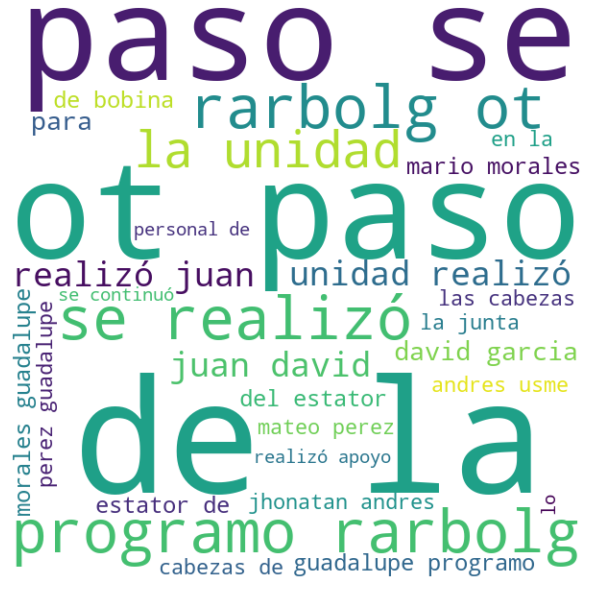

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

#textoWC = ' '.join(words)

wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='white', 
                max_words=30,
                relative_scaling =0,
                min_font_size = 10).generate(new_txt) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 